### Sampling and Parameter Estimation


A few quick orders of business first...

#### 1) Many people's GitHub usernames aren't very identifying, please fill out this form so we can connect you to your username: https://forms.gle/GDAPE84Sf2fa7feD8

#### 2) Proposals are due end of the day on Friday! Please include the following information:

a) What problem you are trying to solve?

b) What datasets you plan to use (either simulated or publically available)?
See here for more information: https://bhorowitz.github.io/FinalProjectDescription.pdf

#### 3) A few minor reminders about homework;

a) Remember to commit as you solve the problems! Don't get caught with a crashed computer an hour before the deadline with nothing uploaded... From here on out there will be a zero-tolerance policy for failure to submit homework on time.

b) All solutions should be in ipynb form (Jupyter notebooks). You shouldn't need to create ancillary .py files.

c) Remember to "Run All Cells" before submission.

d) It is always a good idea to include more plots and supporting text, since sometimes we don't know what you are trying to do...

e) Make sure to commit to the correct repository! Each homework is numbered!

### Uncertainty

In the past two classes we mostly looked at how to find the optimal parameter configuration given some data (such as in our spring example). However, as we saw from our avocado example there is real life uncertainty in experiments due to a number of factors:

1) Sampling Uncertainty: If you only analyze a subset of the whole, there will always be some variation between your inferred value and the true value. In the case of astronomical datasets this enters in a lot of places; for example if we are studying galaxy distributions we are limited in how many galaxies we can sample on the sky, as well as in the limited number of photons we get from each galaxy.

2) Instrumental Uncertainty: Usually our measurement devices have some limit in their precision. A classic example is in CMB experiments, where one needs to have ultra-cold detectors in order to to measure the very cold CMB (2.7 K). 

3) Bias: Our sample might not be representative of the true data in a systematic way. For example, in a galaxy survey we might preferentially pick out bright galaxies, since those are all we can see at a far distance. A different kind of uncertainty than (1/2) since it can cause an overall shift of the dataset.

We want to not only include the variations in uncertainty in our fit (such as in the chi-squared calculations) but also we want to propogate it through to parameter uncertainty. Here we will show how this works in a few simple examples.

### Hubble Example

In [3]:
%pylab inline
hubble_data = np.array([[  2.78000000e+02,   6.50000000e+02,   1.52000000e+00],
       [  5.84000000e+02,   1.80000000e+03,   3.45000000e+00],
       [  9.36000000e+02,   1.30000000e+03,   2.37000000e+00],
       [  1.02300000e+03,   3.00000000e+02,   6.20000000e-01],
       [  1.70000000e+03,   8.00000000e+02,   1.16000000e+00],
       [  2.68100000e+03,   7.00000000e+02,   1.42000000e+00],
       [  2.68300000e+03,   4.00000000e+02,   6.70000000e-01],
       [  2.84100000e+03,   6.00000000e+02,   1.24000000e+00],
       [  3.03400000e+03,   2.90000000e+02,   7.90000000e-01],
       [  3.11500000e+03,   6.00000000e+02,   1.00000000e+00],
       [  3.36800000e+03,   9.40000000e+02,   1.74000000e+00],
       [  3.37900000e+03,   8.10000000e+02,   1.49000000e+00],
       [  3.48900000e+03,   6.00000000e+02,   1.10000000e+00],
       [  3.52100000e+03,   7.30000000e+02,   1.27000000e+00],
       [  3.62300000e+03,   8.00000000e+02,   1.53000000e+00],
       [  4.11100000e+03,   8.00000000e+02,   1.79000000e+00],
       [  4.52600000e+03,   5.80000000e+02,   1.20000000e+00],
       [  4.56500000e+03,   1.10000000e+03,   2.35000000e+00],
       [  4.59400000e+03,   1.14000000e+03,   2.23000000e+00],
       [  5.00500000e+03,   9.00000000e+02,   2.06000000e+00],
       [  5.86600000e+03,   6.50000000e+02,   1.73000000e+00]])

Populating the interactive namespace from numpy and matplotlib


In [4]:
def chisquared(x_dat, x_model, sigma = 0.05):
    return np.sum((x_dat  - x_model)**2 / sigma)

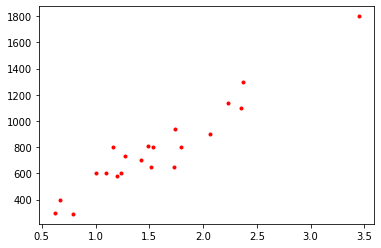

In [5]:
plt.plot(hubble_data[:,2], hubble_data[:,1], "r.")

In [6]:
m_values = np.linspace(300,1200)
chi_values = np.zeros(m_values.shape)
for i,m in enumerate(m_values):
    chi_values[i] = chisquared(hubble_data[:,2],1/m*hubble_data[:,1])

Text(0, 0.5, '$\\chi^2$')

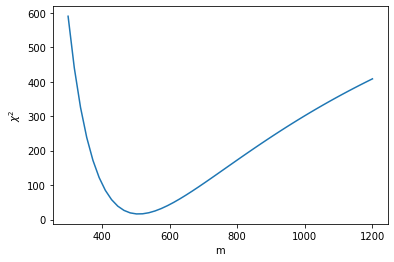

In [7]:
plt.plot(m_values,chi_values)
plt.xlabel("m")
plt.ylabel("$\chi^2$")

Very asymmetrical distribution (known as a chi-squared distribution)! The actual normalization here is important though, since it will determine the contour lines (i.e. where the 1 sigma and 2 sigma lines are). 

Hubble sadly didn't provide error bars on his measurements (at least not in his paper)... Bad science today, but I guess okay for 100 years ago... Lets assume very large errorbars!

In [8]:
m_values = np.linspace(300,1200)
chi_values = np.zeros(m_values.shape)
for i,m in enumerate(m_values):
    chi_values[i] = chisquared(hubble_data[:,2],1/m*hubble_data[:,1],sigma=0.5)

In [9]:
chi_values.min() #is the minimal chi-squared value

1.6314652918236496

Text(0, 0.5, '$\\chi^2$')

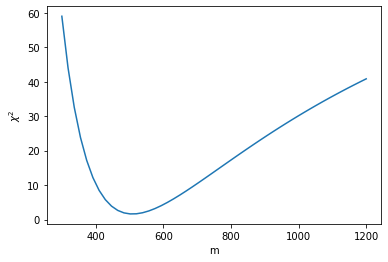

In [10]:
plt.plot(m_values,chi_values)
plt.xlabel("m")
plt.ylabel("$\chi^2$")

Relating this to deviations can be done via a chi-squared table. See here: https://faculty.elgin.edu/dkernler/statistics/ch09/9-3.html

In this case our degrees of freedom equal the length of our data + our one parameter (m)

In [11]:
dof = len(hubble_data[:,2]) + 1
# checking the result in out table to get the one_sigma 
one_sigma = chi_values.min() + 9.542
level_90= chi_values.min() + 30.813

Text(0, 0.5, '$\\chi^2$')

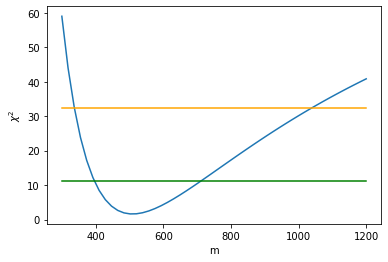

In [12]:
plt.plot(m_values,chi_values)
plt.plot(m_values, np.ones(len(m_values))*one_sigma, color = 'green') # 
plt.plot(m_values, np.ones(len(m_values))*level_90, color = 'orange')

plt.xlabel("m")
plt.ylabel("$\chi^2$")

### Sampling posteriors...

Often times for very high dimensional parameter spaces it would be very costly to do a grid calculation like we did above. Lets now use a sampling method based on our MCMC of the previous lesson. Below is an [example from this blog](https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a).

The essential idea is instead of moving through parameter space like we did yesterday where we only move to the new point if the likilehood is better, this time we move probabilistically. If the point has a better chisquared we almost always move, while if it is slightly worse we may or may not move. We then use the whole chain to 

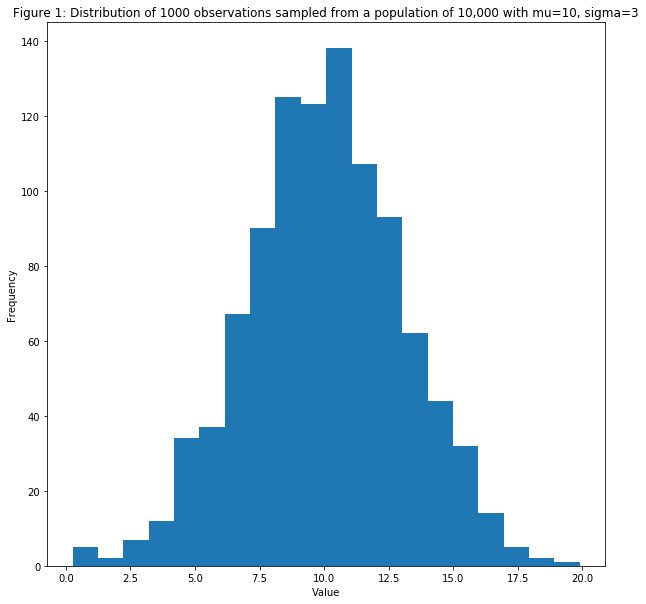

In [14]:
model = lambda t : np.random.normal(10,3,t) # a gaussian distribution with norm average 10, stdev 3

population = model(10000) #draw 100000 samples

#Assume we are only able to observe 1,000 of these individuals. 
observation = population[np.random.randint(0, 10000, 1000)]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( observation,bins=20)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 1000 observations sampled from a population of 10,000 with mu=10, sigma=3")
mu_obs=observation.mean()

In [15]:
print(mu_obs)

10.047294289


In [16]:
#The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: [x[0], np.random.normal(x[1], 0.5, (1,))]

def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) = 0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<= 0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <= 0):
        return 0
    return 1

#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
def manual_log_like_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi))-((data-x[0])**2) / (2*x[1]**2))

#Same as manual_log_like_normal(x,data), but using scipy implementation. It's pretty slow.
def log_lik_normal(x, data):
    # x[0]=mu, x[1]=sigma (new or current)
    # data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))


#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new > x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init, iterations, data, acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new = transition_model(x) 
        x_lik = likelihood_computer(x, data)
        x_new_lik = likelihood_computer(x_new, data) 
        if (acceptance( x_lik + np.log(prior(x)), x_new_lik + np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [22]:
print(transition_model([0, 1.5]))
x = [0, 1]
-np.log(x[1] * np.sqrt(2* np.pi))

[0, array([ 2.00067629])]


-0.91893853320467267

In [23]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu_obs,0.1], 50000,observation,acceptance)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


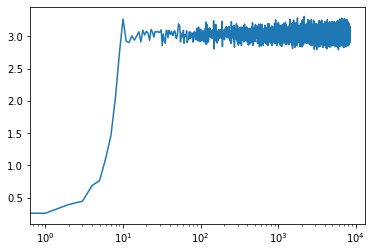

In [24]:
plt.semilogx(accepted[:,1])
#plt.plot(accepted[:,0])

In [27]:
q = np.array([i for i in accepted[:,1]])

(array([   27.,   256.,   921.,  1699.,  2025.,  1739.,  1119.,   383.,
           75.,    13.]),
 array([ 2.79173768,  2.84309124,  2.8944448 ,  2.94579836,  2.99715192,
         3.04850548,  3.09985904,  3.1512126 ,  3.20256616,  3.25391972,
         3.30527328]),
 <a list of 10 Patch objects>)

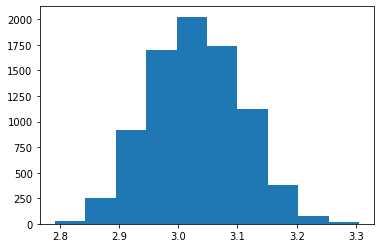

In [28]:
hist(q[100:])

However, we don't need to use code it up ourselves! Lets use emcee to do it for us!

Installing emcee: 
pip install emcee --user

In [29]:
import numpy as np
import emcee

In [30]:
def lnprob(x, mu): #chi-squared
    diff = x-mu
    return -np.dot(diff,diff)/2.0 

In [32]:
nwalkers = 250 #number of points moving around probability space
ndim = 3 # number of dimensions for our problem, in this case three
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim)) #initializing walker starting locations


In [33]:
means = np.random.rand(ndim) #random starting mean positions
print(means)

[ 0.60529053  0.96104981  0.00301975]


In [7]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means])


In [14]:
pos, prob, state = sampler.run_mcmc(p0, 100) #burn in! staring locations could be far away from distribution
sampler.reset()

In [9]:
sampler.run_mcmc(pos, 1000)

(array([[ 1.07637116, -0.36269392, -0.20785366],
        [-0.9147902 ,  1.08586372, -0.08565481],
        [ 1.55906141, -0.1542147 ,  2.16539494],
        [ 0.60342649, -0.13539461,  0.10769673],
        [ 2.43799108, -0.23207031,  1.15894508],
        [ 0.31745749,  0.30262516,  0.64541425],
        [ 2.34842329,  0.31877864, -0.01851665],
        [ 0.34518305, -0.13033655,  0.5221906 ],
        [ 0.81848691,  0.40273168,  0.63763683],
        [ 0.26584588, -0.03451795,  0.32850133],
        [-0.08451815,  0.15479188,  1.89157515],
        [ 1.89156037,  0.69995936,  0.44598156],
        [ 0.24563634,  1.69052142,  0.59810588],
        [ 1.7072716 ,  0.04975509, -0.10101935],
        [-0.39741938,  0.3656363 ,  1.14757535],
        [ 2.65833066, -0.28694791,  0.75237395],
        [ 0.85435467,  1.57661227, -1.04637889],
        [-0.12230706,  0.89195231,  1.34620879],
        [-1.68189379,  1.56004823, -0.32319643],
        [ 0.78124918,  0.83770852, -0.36136088],
        [ 0.6039185 

Populating the interactive namespace from numpy and matplotlib


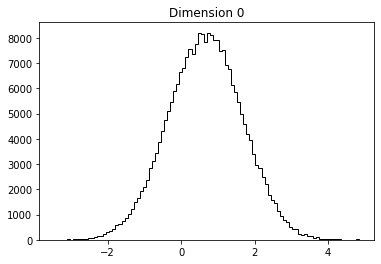

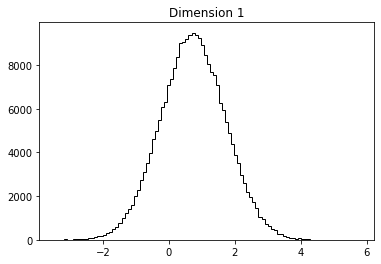

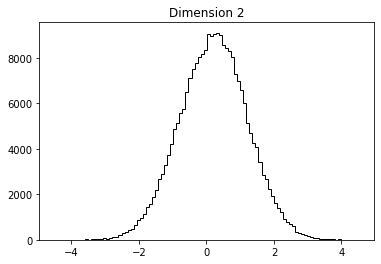

In [11]:
%pylab inline 
import matplotlib.pyplot as pl

for i in range(3):
    pl.figure()
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d}".format(i))

pl.show()

In [12]:
import corner

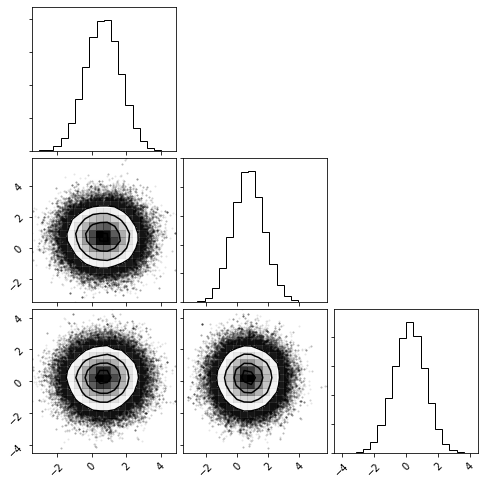

In [13]:
figure = corner.corner(sampler.flatchain[:])

Very nicely Guassian! Lets add some "covariance"!

In [16]:
ndim =3 
cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

In [17]:
icov = np.linalg.inv(cov)



In [18]:
def lnprob(x, mu, icov):
    diff = x-mu
    return -np.dot(diff,np.dot(icov,diff))/2.0


In [19]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, icov])

In [20]:
pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()


In [21]:
sampler.run_mcmc(pos, 1000)


(array([[-1.54838703e-01,  1.07299356e+00,  4.68739135e-03],
        [ 6.61582884e-01,  1.29175603e+00,  8.51467953e-01],
        [ 6.75273313e-01,  7.35268557e-01, -2.70262608e-01],
        [ 3.82671971e-01,  1.62545837e-01, -1.35073407e-01],
        [ 4.81155161e-01,  8.48503669e-01,  4.37906149e-01],
        [ 7.61922919e-01,  1.18184200e+00,  7.65095508e-01],
        [ 2.63951822e-01,  6.65368265e-01, -5.63122127e-01],
        [ 1.27446847e+00, -2.62301229e-01, -2.67398399e-02],
        [ 2.42899684e-01,  9.07087966e-01, -2.97318020e-01],
        [ 4.66377423e-01,  1.48851398e+00,  1.41158617e+00],
        [ 1.96049083e-01,  1.29740455e+00,  2.45941484e-01],
        [ 2.15328740e-01,  1.27629629e+00,  3.24694650e-01],
        [ 6.64705699e-01,  8.57596439e-01, -5.07911792e-02],
        [ 1.00483360e+00,  1.79943419e-01,  2.26675125e-01],
        [ 1.20507224e+00,  9.12383664e-01,  7.69417729e-01],
        [ 2.73536037e-01,  2.88754453e-01, -1.12032241e+00],
        [ 8.20699608e-01

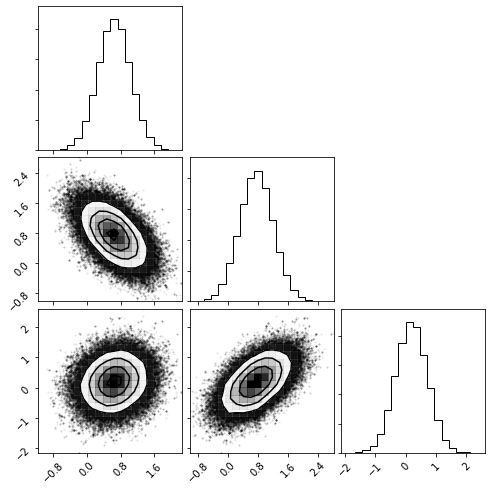

In [22]:
figure = corner.corner(sampler.flatchain[:])

### Additional Material : For Day 8

Spring system MCMC

Here we are trying to sample the parameter space of our spring system...

In [39]:
%pylab inline

def true_motion(t,x_0,v_0,k,b,m):
    w0 = sqrt(k/m)
    b0 = b/m
    
    if b0**2.-4.*w0**2.>0:
        raise NameError("Not underdamped system! "+ str(b0**2.-4.*w0**2.) )
        
    gamma = 1/2. *sqrt(4*w0**2. - b0**2.)
    
    A = x_0
    B = v_0 + 1/2.*gamma*x_0
    return (A*np.cos(t*gamma)+B*np.sin(t*gamma))*np.exp(-b0*t/m)

Populating the interactive namespace from numpy and matplotlib


In [40]:
def neg_chi_squared(parameter_guess, data):
 #   print(parameter_guess.shape)
    x_0, k, b = parameter_guess
    m = 10
    v_0 =0
    t_array = data[:,0]
    x_experiment = data[:,1]
    #enforcing a flat prior on the parameters, if they are outside of this range
    #the likelihood is negative infinity (forcing the transition prob to zero)
    if k<0 or k>1000:
        return -np.inf
    if b<-1000 or b>1000:
        return -np.inf
    if x_0<-1000 or x_0>1000:
        return -np.inf
    try:
        x_guess = true_motion(t_array,x_0,v_0,k,b,m)
    
        chi_squared = np.power((x_guess - x_experiment),2)/(0.05)**2
       # print(-np.sum(chi_squared))
        return -np.sum(chi_squared)
    #there will be an exception if not underdamped system, my prior is strongly
    # for underdamped system
    except:
        return -np.inf
    

In [41]:
#true values
k = 8.25 #spring constant
sigma_x = 0.04 #uncertainty in the x measurement
x_0 = 0.5 #staring position
v_0 = 0.0 #starting velocity
b = 4. #damping
m = 10. #mass

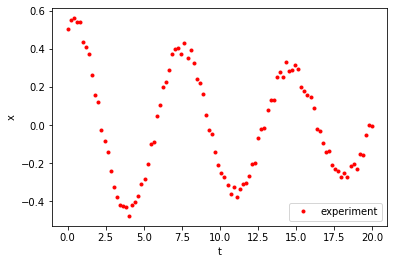

In [42]:
d_out = np.genfromtxt("../Day6/data/hooks_law.txt")
t_range=d_out[:,0]
x_range=d_out[:,1]
plt.plot(d_out[:,0],d_out[:,1],"r.",label="experiment")
plt.xlabel("t")
plt.ylabel("x")
#plt.plot(t_range,[true_motion(t,x_0,v_0,k,b,m) for t in t_range],label = "theory curve")
plt.legend(loc=4)

In [43]:
emcee.EnsembleSampler?

In [44]:
import emcee
nwalkers = 100
ndim = 3

parameters = [0,0,0]

sampler = emcee.EnsembleSampler(nwalkers, ndim, neg_chi_squared, args=[d_out])

In [47]:
print(sampler)

In [48]:
#nwalkers = 250 #number of points moving around probability space
#ndim = 3 #number of dimensions for our problem, in this case three
p0 = [0.5,7,3] + np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))/2 #initializing walker starting locations
print(p0)

[[ 0.82078343  7.14826539  3.06357597]
 [ 0.7386557   7.37067749  3.0746726 ]
 [ 0.55695441  7.4092744   3.08167299]
 [ 0.92625833  7.19374188  3.18933228]
 [ 0.88893989  7.28473472  3.28472055]
 [ 0.57284973  7.23241865  3.28789573]
 [ 0.74665867  7.23413516  3.31555657]
 [ 0.99169786  7.12246531  3.18823572]
 [ 0.52884022  7.48230468  3.06845802]
 [ 0.53774879  7.03606635  3.04248534]
 [ 0.98419748  7.32490719  3.39732766]
 [ 0.83750327  7.25364778  3.3258288 ]
 [ 0.57038516  7.30415953  3.37797982]
 [ 0.87783546  7.35589619  3.14344066]
 [ 0.62431495  7.48082333  3.0405769 ]
 [ 0.9705741   7.06519745  3.34554142]
 [ 0.85273255  7.19973906  3.17255102]
 [ 0.72786641  7.38057687  3.05840723]
 [ 0.93973511  7.12354595  3.42124643]
 [ 0.67534062  7.12062244  3.07123117]
 [ 0.87300637  7.22004374  3.32640662]
 [ 0.65692909  7.18784508  3.11913285]
 [ 0.95538688  7.10972514  3.10485217]
 [ 0.84491778  7.45621023  3.27691208]
 [ 0.67106483  7.24877615  3.46759511]
 [ 0.59083499  7.38258649

In [51]:
pos, prob, state = sampler.run_mcmc(p0, 3000) 
#long burnin seems nessisary for some strange reason...

In [57]:
sampler.run_mcmc?

In [58]:
print(state)

('MT19937', array([1218835828, 3525353437, 4232655985, 1896146504, 3551798786,
       2303876481, 2450460670, 2555029364, 3210022779, 1723951659,
        507004889, 1128813506, 2678141357, 3552381838,  989933124,
       2320878260, 1656262577, 2931693330,  378086048,  829090556,
        590162921, 3480686371, 4233399392, 3661601704,  198981203,
       4287451559, 2787883582, 2474496587, 2348524902, 1168739306,
       2662041205, 2276809876, 1442260770, 2267184581, 1733935636,
        249897835, 3509388518, 3732515730,  775822798, 3962321069,
       2044994688, 4285558625, 1901110796, 3614064303, 2544207131,
       2631640155, 1407754738, 1204465205,  812181647, 2402087587,
       3881936008, 1967122293,  615607479, 3711693016, 2547035876,
       3117261691, 1846773901,  745523596, 3270177421, 2489204253,
       1905086639, 2426147048, 2850828611, 1289307840, 3521952478,
       3856518709, 1976337678, 3035979350, 1757791199, 3572234766,
       2643000313, 1356597946,  475415053, 2190355

In [64]:
sampler.reset()
_ = sampler.run_mcmc(pos, 500)

print(sampler.flatchain.shape)

(50000, 3)


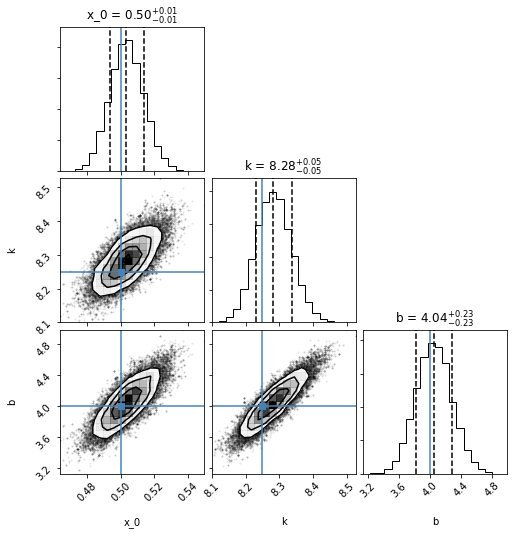

In [68]:
#Showing sample chain with most likely point...
import corner
figure = corner.corner(sampler.flatchain[:],labels=["x_0","k","b"],truths=[0.5,8.25,4],quantiles=[0.16, 0.5, 0.84],show_titles=True)

For this dataset we find the parameters very accurately, within one sigma for all three (yay!). Notice that some error bars aren't quite symmetrical (like b) hence we quote an asymmetric standard deviation with both plus and minus.

Now lets get a sence of what happens when we venture futher out, say to the three sigma lines... notice that there is a mild covariance between the parameters (hence their oblong diagonal shape) so we need to vary the parameters in the same direction to stay on the contours.

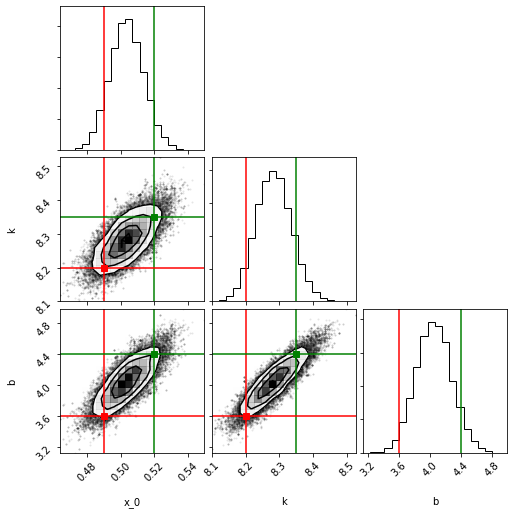

In [70]:
import corner
figure = corner.corner(sampler.flatchain[:],labels=["x_0","k","b"])


value1 = [0.52,8.35,4.4]
value2 = [0.49,8.2,3.6]
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))
# print(axes)
# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1[i], color="g")
    ax.axvline(value2[i], color="r")

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="g")
        ax.axvline(value2[xi], color="r")
        ax.axhline(value1[yi], color="g")
        ax.axhline(value2[yi], color="r")
        ax.plot(value1[xi], value1[yi], "sg")
        ax.plot(value2[xi], value2[yi], "sr")

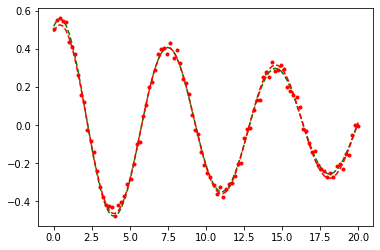

In [107]:
m = 10
v_0 =0
t = d_out[:,0]

x_0,k,b = [0.52,8.35,4.4]
plt.plot(t,true_motion(t,x_0,v_0,k,b,m),'g--')

x_0,k,b = [0.49,8.2,3.6]
plt.plot(t,true_motion(t,x_0,v_0,k,b,m),'r--')

x_experiment =  d_out[:,1]
#plt.plot(t,true_motion(t,x_0,v_0,k,b,m))
plt.plot(t,x_experiment,"r.")

Notice that both seem to fit the data extremely well! Lets say we varried in a different direction, still a few standard deviations off, but not along the covariance...

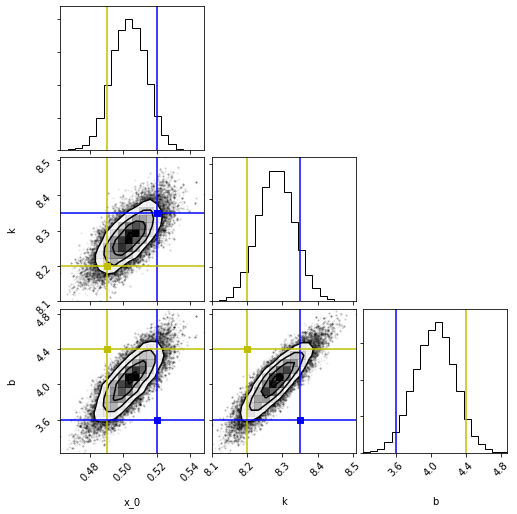

In [113]:
import corner
figure = corner.corner(sampler.flatchain[:],labels=["x_0","k","b"])


value1 = [0.49,8.2,4.4]
value2 = [0.52,8.35,3.6]
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1[i], color="y")
    ax.axvline(value2[i], color="b")

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="y")
        ax.axvline(value2[xi], color="b")
        ax.axhline(value1[yi], color="y")
        ax.axhline(value2[yi], color="b")
        ax.plot(value1[xi], value1[yi], "sy")
        ax.plot(value2[xi], value2[yi], "sb")

In [35]:
m = 10
v_0 =0
t = d_out[:,0]

x_0,k,b = [0.49,8.2,4.4]
plt.plot(t,true_motion(t,x_0,v_0,k,b,m),'y--')

x_0,k,b = [0.52,8.35,3.6]
plt.plot(t,true_motion(t,x_0,v_0,k,b,m),'b--')

x_experiment =  d_out[:,1]
#plt.plot(t,true_motion(t,x_0,v_0,k,b,m))
plt.plot(t,x_experiment,"r.")

NameError: name 'd_out' is not defined

The fit looks noticably worse! Even though we varied the parameters the same amount, because we didn't vary them in the same direction we ended up with a very poor quality fit!


### Completely optional analytical extension

If you are curious, you can figure out the directions of the covariance analytically, by looking at the hessian of the chi-squared with respect to the various parameters.

$H_{ij} = \frac{\partial \chi^2}{\partial x_i \partial x_j}$

where x is the parameters. The eigenvectors the hessian will give you the three dimension vectors where the chi-squared changes most rapidly.


In [34]:
import copy


h = 0.001
def derivative(func, i, param = [0.5,8.25,4], data=d_out, h=0.001):
    
    a = func(param, d_out)
    
    new_param = copy.deepcopy(param)
    new_param[i] += h
    
    b = func(new_param, d_out)
    
    return (a - b)/h
    


NameError: name 'd_out' is not defined

In [158]:
hessian = np.zeros([3,3])

param = [0.5,8.25,4]

h = 0.001

for i in range(0,3):
    for j in range(0,3):
        
        a = derivative(neg_chi_squared,i)
        
        new_param = copy.deepcopy(param)
        new_param[j] += h
        
        b = derivative(neg_chi_squared,i,param=new_param)
        
        hessian[j, i] = (a-b)/h

In [161]:
hessian

array([[-25047.81056357,     96.00602684,    855.50033992],
       [    96.00602684,  -1520.43274478,    290.13635866],
       [   855.50033992,    290.13635866,   -106.84394434]])

In [174]:
eigenvalues, eigenvectors = np.linalg.eig(-hessian)

In [175]:
eigenvectors[0] #Primary degenercy direction

array([ 0.99940842, -0.03426271,  0.00297992])